<h1>Análisando algoritmos de ordenamiento</h1>

In [15]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

<h2>Problema de ordenamiento</h2>

Input:  $A[1..n] = <a_1,a_2\ldots, a_n>$

Output: $A'[1..n] = <a'_1,a'_2\ldots, a'_n> : a'_1\leq a'_2 \leq \ldots \leq  a'_n$

<h3> Ordenamiento por inserción </h3>

In [3]:
def insertion_sort(A):
    j = 1
    while j < len(A):
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1
        A[i + 1] = key
        j = j + 1

In [ ]:
B = np.random.permutation(range(0,10))
print B
insertion_sort(B)
print B

<h4>Correctitud</h4>

<b>Invariante:</b> Al comienzo de cada iteración del ciclo externo el subarreglo $A[0..j-1]$ consiste de los elementos originalmente en $A[0..j-1]$ pero ordenados.

In [2]:
def invariant(A, original_A):
    l1 = list(A)
    l2 = list(original_A)
    l2.sort()
    return l1 == l2

In [3]:
print invariant([1, 2, 3, 4], [4, 3, 2, 1])
print invariant([1, 2, 3, 4], [5, 3, 2, 1])

True
False


Algoritmo de ordenamiento por inserción incluyendo evaluación de la invariante (inicialización, mantenimiento, terminación)

In [6]:
def right_insertion_sort(A):
    original_A = list(A)
    j = 1
    assert invariant(A[0:j], original_A[0:j])
    while j < len(A):
        assert invariant(A[0:j], original_A[0:j])
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1        
        A[i + 1] = key
        j = j + 1
    assert invariant(A[0:j], original_A[0:j])

In [7]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
right_insertion_sort(B)
print B

[1, 2, 3, 4, 5, 6, 7, 8, 9]


La siguiente función incluye un error, por lo tanto la aserción para comprobar el invariante de ciclo falla. Esto genera una excepción que es capturada para imprimir un mensaje y el estado de las variables.

In [8]:
def wrong_insertion_sort(A):
    original_A = list(A)
    j = 1
    try:
        assert invariant(A[0:j], original_A[0:j])
        while j < len(A):
            assert invariant(A[0:j], original_A[0:j])
            key = A[j]
            i = j - 1
            while (i >= 0) and (A[i] < key):
                A[i + 1] = A[i]
                i = i - 1        
            A[i + 1] = key
            j = j + 1
        assert invariant(A[0:j], original_A[0:j])
    except  AssertionError:
        print "Error en el invariante de ciclo!"
        print "j=", j
        print "i=", i
        print "A=", A
        print "Original A=", original_A

In [9]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
wrong_insertion_sort(B)

Error en el invariante de ciclo!
j= 2
i= 0
A= [5, 4, 6, 3, 7, 2, 8, 1, 9]
Original A= [5, 4, 6, 3, 7, 2, 8, 1, 9]


<h4> Análisis del tiempo de ejecución</h4>

In [63]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def acct_insertion_sort(A, acct):
    j = 1; acct.count()
    acct.count()
    while j < len(A):
        acct.count()
        key = A[j]; acct.count()
        i = j - 1; acct.count()
        acct.count()
        while (i >= 0) and (A[i] > key):
            acct.count()
            A[i + 1] = A[i]; acct.count()
            i = i -1; acct.count()
        A[i + 1] = key; acct.count()
        j = j + 1; acct.count()
        
def merge_sort_acct(l, acct):

    tic = time.clock()#get start time
    
    if len(l)>1:
        acct.count()
        mid = len(l)//2; acct.count() 
        lefthalf = l[:mid]; acct.count()
        righthalf = l[mid:]; acct.count() 

        merge_sort_acct(lefthalf, acct)
        merge_sort_acct(righthalf, acct)

        i=0
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf):
            acct.count()
            if lefthalf[i] < righthalf[j]:
                acct.count()
                l[k]=lefthalf[i]; acct.count() 
                i=i+1; acct.count()
            else:
                l[k]=righthalf[j]; acct.count()
                j=j+1; acct.count()
            k=k+1; acct.count() 

        while i < len(lefthalf):
            acct.count()
            l[k]=lefthalf[i]; acct.count() 
            i=i+1; acct.count() 
            k=k+1; acct.count() 

        while j < len(righthalf):
            acct.count()
            l[k]=righthalf[j]; acct.count() 
            j=j+1; acct.count() 
            k=k+1; acct.count()
        toc = time.clock()#get final time

In [68]:
B = np.random.permutation(range(0,10))
acct = Counter()
acct_insertion_sort(B, acct)
acct.print_steps()
merge_sort_acct(B, acct)
acct.print_steps()

Number of steps = 116
Number of steps = 303


<h4>Análisis experimental</h4>
Ahora vamos a analizar el comportamiento del algoritmo cuando el tamaño de la entrada varía. La siguiente función genera arreglos al azar de tamaño 1 a n, llama la función acct_insertion_sort(l, acct) y contabiliza el número de pasos.

In [109]:
import random as rnd
import time

def exper_analysis(n):
    results = []
    acct = Counter()
   
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        merge_sort_acct(l, acct)
        results.append(acct.steps)
    return results

def exper_analysis_time(n):
    results = []
    
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        tic = time.clock()#get final time
        merge_sort_acct(l, acct)
        toc = time.clock()#get final time
        t = (toc-tic)*3500000
        results.append(t)
    return results

In [113]:
print exper_analysis_time(50)

[20.99999999671809, 24.499999987881438, 83.99999999930685, 161.0000000038525, 251.99999999792055, 357.00000000638, 458.4999999988071, 584.4999999915501, 668.5000000032915, 797.9999999996323, 916.9999999976142, 1056.999999992314, 1176.0000000027303, 1288.000000005951, 1406.9999999914985, 1536.5000000002738, 1683.5000000021694, 1830.4999999916304, 1991.5000000079176, 2138.500000009813, 2275.000000000915, 2425.499999993974, 2555.0000000027494, 2719.4999999977654, 2873.499999994422, 3118.5000000100163, 3153.500000008691, 3310.999999996511, 3472.000000000364, 3601.4999999967044, 3766.000000004155, 3940.99999999753, 4060.0000000079463, 4255.999999998039, 4413.500000010728, 4535.999999999874, 4707.499999989651, 4885.999999999058, 5043.499999999312, 5200.999999999567, 5389.999999994899, 5561.4999999971105, 5691.000000005886, 5897.4999999943375, 6062.000000001788, 6198.500000005325, 6383.999999997059, 6555.500000011705, 6758.500000008993, 6902.000000007291]


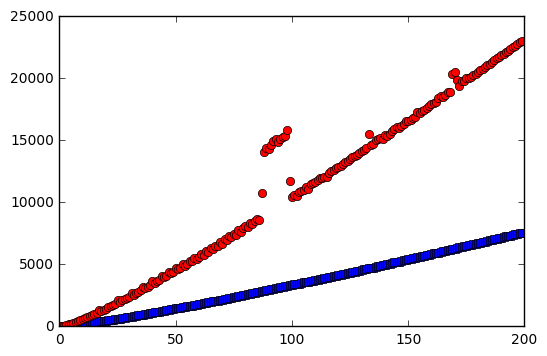

In [122]:
pl.clf()
x = np.arange(200)
y = np.array(exper_analysis(200))
pl.plot(x, y, 'bs')
i = np.array(exper_analysis_time(200))
pl.plot(x, i, 'ro')

#Actividad
 <ol>
  <li>En una sola gráfica represente el número de operaciones, tiempo y T(n) que el algoritmo de ordenamiento por inserción requiere para ordenar arreglos de tamaño n (varie n) en el peor de los casos.</li>
  <li>Replique los ejercicios realizados en este taller para el algoritmo de ordenamiento por mezclas (merge sort)</li>
  <li>Replique los ejercicios realizados en este taller para el algoritmo de ordenamiento quick-sort</li>
</ol> 

In [6]:
import time
tic = time.clock()#get start time
toc = time.clock()#get final time

<h4> Ordenamiento por mezclas</h4>

In [69]:
def merge_sort(l):
    
    if len(l)>1:
        
        mid = len(l)//2 
        lefthalf = l[:mid] 
        righthalf = l[mid:] 

        mergeSort(lefthalf)
        mergeSort(righthalf)

        i=0
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf):
            
            if lefthalf[i] < righthalf[j]:
                
                l[k]=lefthalf[i] 
                i=i+1 
            else:
                l[k]=righthalf[j] 
                j=j+1 
            k=k+1 

        while i < len(lefthalf):
            
            l[k]=lefthalf[i] 
            i=i+1 
            k=k+1 

        while j < len(righthalf):
            
            l[k]=righthalf[j] 
            j=j+1 
            k=k+1 

In [72]:
lista = [20,15,26,365,98,12,1,35,69]
print lista
acct = Counter()
merge_sort_acct(lista, acct)
print lista
acct.print_steps()


[20, 15, 26, 365, 98, 12, 1, 35, 69]
[1, 12, 15, 20, 26, 35, 69, 98, 365]
Number of steps = 157
